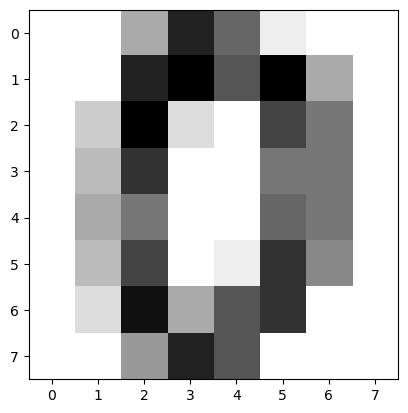

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# 이미지를 평판화 n x sample x 8 8 => n_sample x 64

In [91]:

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [92]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [94]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9638888888888889
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  1]
 [ 0  0 34  1  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  1  0 30  0  1  0  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  4  0  0  0  0  1  0 27  0]
 [ 0  0  0  1  0  0  0  0  1 42]]


In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [96]:
# 테스트 데이터로 예측해본다.

y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9888888888888889


In [97]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9888888888888889
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  1  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  1  0  0  0  0  0  0 31  0]
 [ 0  0  0  1  0  0  0  0  0 43]]


In [98]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8222222222222222
[[34  0  0  0  0  0  0  1  1  0]
 [ 0 30  2  1  2  0  0  1  2  3]
 [ 0  2 32  1  0  0  0  0  0  0]
 [ 0  1  1 31  0  0  0  0  0  1]
 [ 1  0  0  0 28  0  2  4  0  0]
 [ 1  0  0  0  1 28  1  0  0  1]
 [ 0  0  1  0  1  0 37  0  0  0]
 [ 0  1  0  0  2  0  0 24  0  5]
 [ 1  2  2  2  1  0  0  1 23  0]
 [ 1  0  0  3  8  1  1  0  1 29]]


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.975
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  1  1  0  0  1  0  1 28  0]
 [ 0  0  0  0  0  0  0  1  1 42]]


In [113]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

y = digits.target
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2)

In [114]:
X_train.shape

(1437, 64)

In [115]:
y_train.shape

(1437, 10)

In [116]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(50, activation='sigmoid', input_shape=(64,)))
    model.add(layers.Dense(40, activation='sigmoid'))
    model.add(layers.Dense(30, activation='sigmoid'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 50)                3250      
                                                                 
 dense_106 (Dense)           (None, 40)                2040      
                                                                 
 dense_107 (Dense)           (None, 30)                1230      
                                                                 
 dense_108 (Dense)           (None, 10)                310       
                                                                 
Total params: 6,830
Trainable params: 6,830
Non-trainable params: 0
_________________________________________________________________


In [117]:
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
45/45 [==============================] - 3s 27ms/step - loss: 2.2994 - accuracy: 0.2150 - val_loss: 2.2430 - val_accuracy: 0.3889
Epoch 2/100
45/45 [==============================] - 0s 6ms/step - loss: 2.2018 - accuracy: 0.3953 - val_loss: 2.1615 - val_accuracy: 0.4806
Epoch 3/100
45/45 [==============================] - 0s 6ms/step - loss: 2.0905 - accuracy: 0.5978 - val_loss: 2.0318 - val_accuracy: 0.5806
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 1.9287 - accuracy: 0.6242 - val_loss: 1.8602 - val_accuracy: 0.6028
Epoch 5/100
45/45 [==============================] - 0s 7ms/step - loss: 1.7366 - accuracy: 0.7168 - val_loss: 1.6641 - val_accuracy: 0.6889
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 1.5347 - accuracy: 0.7878 - val_loss: 1.4684 - val_accuracy: 0.7444
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 1.3385 - accuracy: 0.8232 - val_loss: 1.2782 - val_accuracy: 0.8056
Epoch 8/100


Epoch 59/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.1329 - val_accuracy: 0.9500
Epoch 60/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.1325 - val_accuracy: 0.9500
Epoch 61/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9500
Epoch 62/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.1325 - val_accuracy: 0.9500
Epoch 63/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.1297 - val_accuracy: 0.9500
Epoch 64/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.1318 - val_accuracy: 0.9500
Epoch 65/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1331 - val_accuracy: 0.9472
Epoch 

In [118]:
         #Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.86      0.97      0.91        32
           2       0.97      0.95      0.96        41
           3       1.00      0.89      0.94        38
           4       1.00      1.00      1.00        32
           5       0.98      0.98      0.98        41
           6       0.95      1.00      0.97        36
           7       0.97      1.00      0.99        33
           8       0.91      0.85      0.88        34
           9       0.90      0.92      0.91        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

[[33  0  0  0  0  0  1  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  1]
 [ 0  1 39  0  0  0  0  0  1  0]
 [ 0  0  1 34  0  0  0  0  1  2]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  1  0  0  0 40  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0